<a href="https://colab.research.google.com/github/SimreAniri/Neural-Networks/blob/master/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Простая нейросеть на Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [37]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [4]:
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


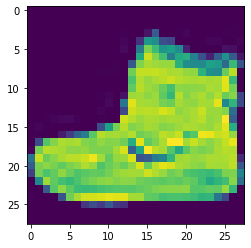

In [5]:
plt.imshow(train_images[0,:,:])
plt.show()

In [6]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Text(0.5, 0, 'accuracy')

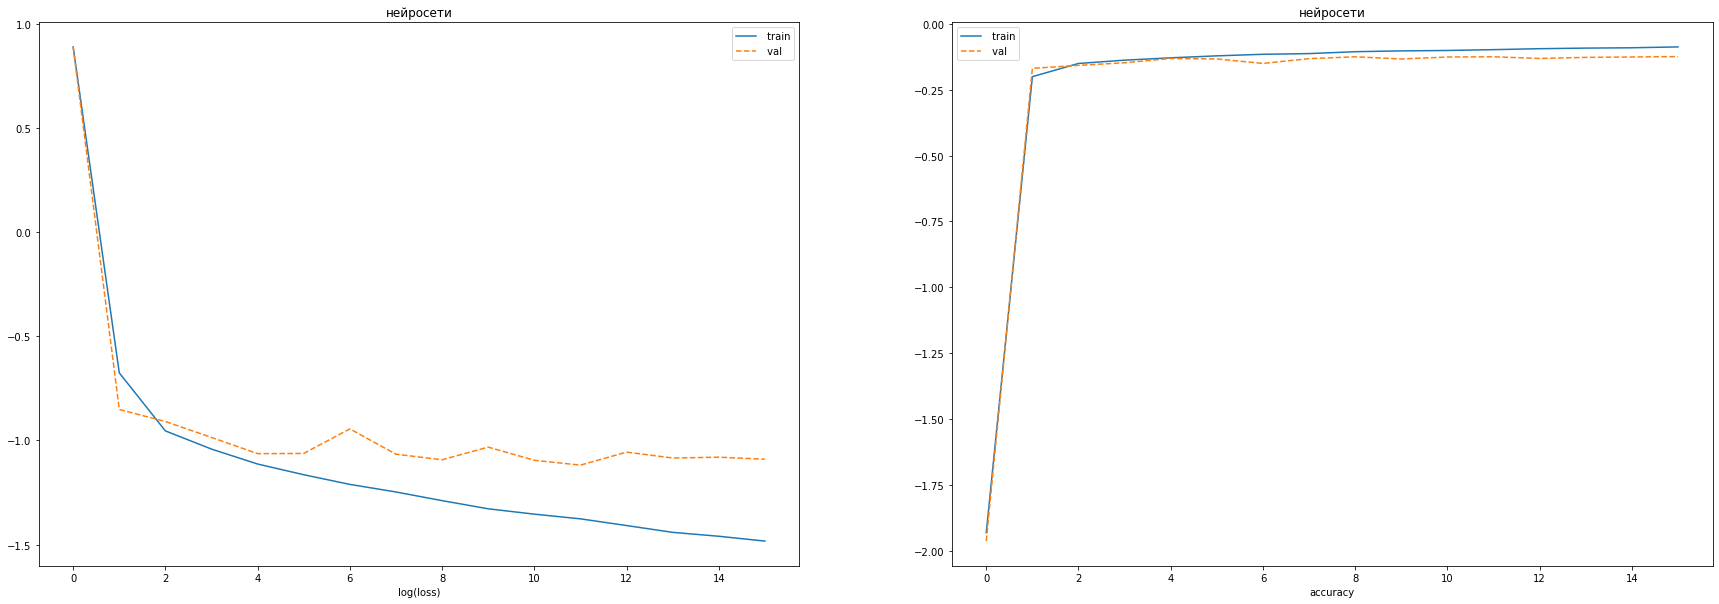

In [32]:
# создаем модель model
model = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(30, 10)

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# компилируем model 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
# вычисляем ошибку для model без обучения
hh0_tr = model.evaluate(  train_images[:50000,:], to_categorical(train_labels[:50000]),verbose = 0)
hh0_val = model.evaluate(  train_images[50000:,:], to_categorical(train_labels[50000:]),verbose = 0)

# проводим обучение модели 
hh = model.fit(
train_images,
to_categorical(train_labels),
epochs=epochs,
batch_size=32, validation_split=0.2, verbose = 0
)
# картинки
ax[0].plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = ' train')
ax[0].plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = ' val')
ax[0].legend()
ax[0].set_title('нейросети')
ax[0].set_xlabel('epoch')
ax[0].set_xlabel('log(loss)')

ax[1].plot(epoch,np.log([hh0_tr[1]]+hh.history['accuracy']),'-',label = ' train')
ax[1].plot(epoch,np.log([hh0_val[1]]+hh.history['val_accuracy']),'--',label = ' val')
ax[1].legend()
ax[1].set_title('нейросети')
ax[1].set_xlabel('epoch')
ax[1].set_xlabel('accuracy')



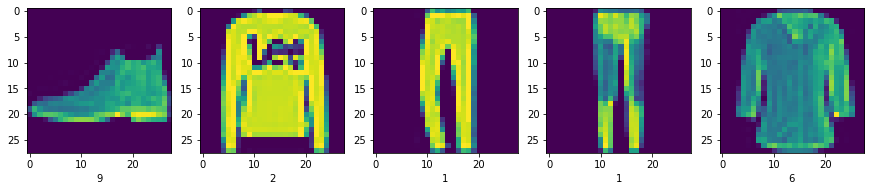

In [8]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [10]:
test_labels[:N]

array([9, 2, 1, 1, 6], dtype=uint8)

в зависимости от числа нейронов в слое(для 2-хслойной сети)

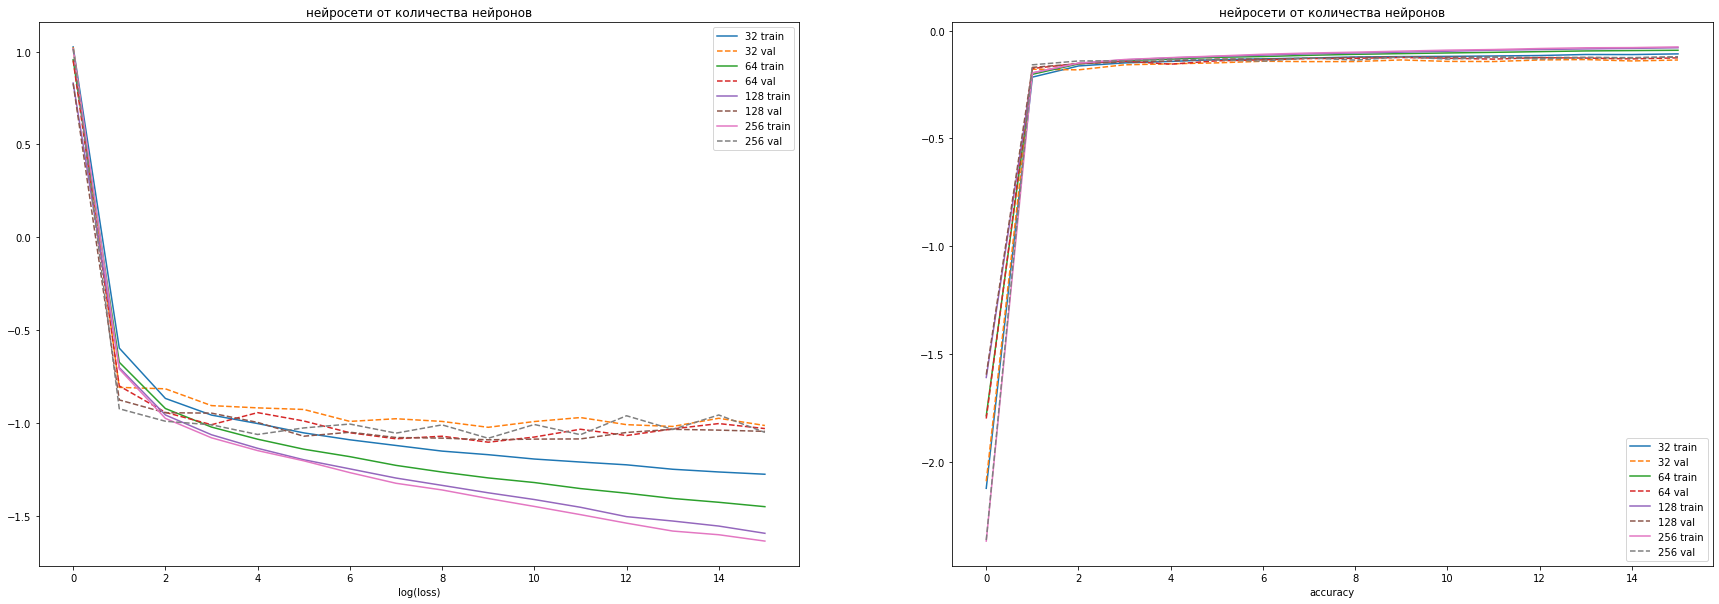

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(30, 10)

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять количество нейронов
for n_neuron in [32, 64, 128, 256]:
  # создаем рабочую модель modeli
  modeli = Sequential([
                      Dense(n_neuron, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])
  
  # компилируем modeli
  modeli.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:50000,:], to_categorical(train_labels[:50000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[50000:,:], to_categorical(train_labels[50000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )
  # картинки
  ax[0].plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str(n_neuron) + ' train')
  ax[0].plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(n_neuron) + ' val')

  ax[1].plot(epoch,np.log([hh0_tr[1]]+hh.history['accuracy']),'-',label = str(n_neuron) + ' train')
  ax[1].plot(epoch,np.log([hh0_val[1]]+hh.history['val_accuracy']),'--',label = str(n_neuron) + ' val')

ax[0].legend()
ax[0].set_title('нейросети от количества нейронов')
ax[0].set_xlabel('epoch')
ax[0].set_xlabel('log(loss)')

ax[1].legend()
ax[1].set_title('нейросети от количества нейронов')
ax[1].set_xlabel('epoch')
ax[1].set_xlabel('accuracy')

plt.show()

При увеличении количества нейронов в слое сеть лучше обучается, но и время на обучение увеличивается

числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)

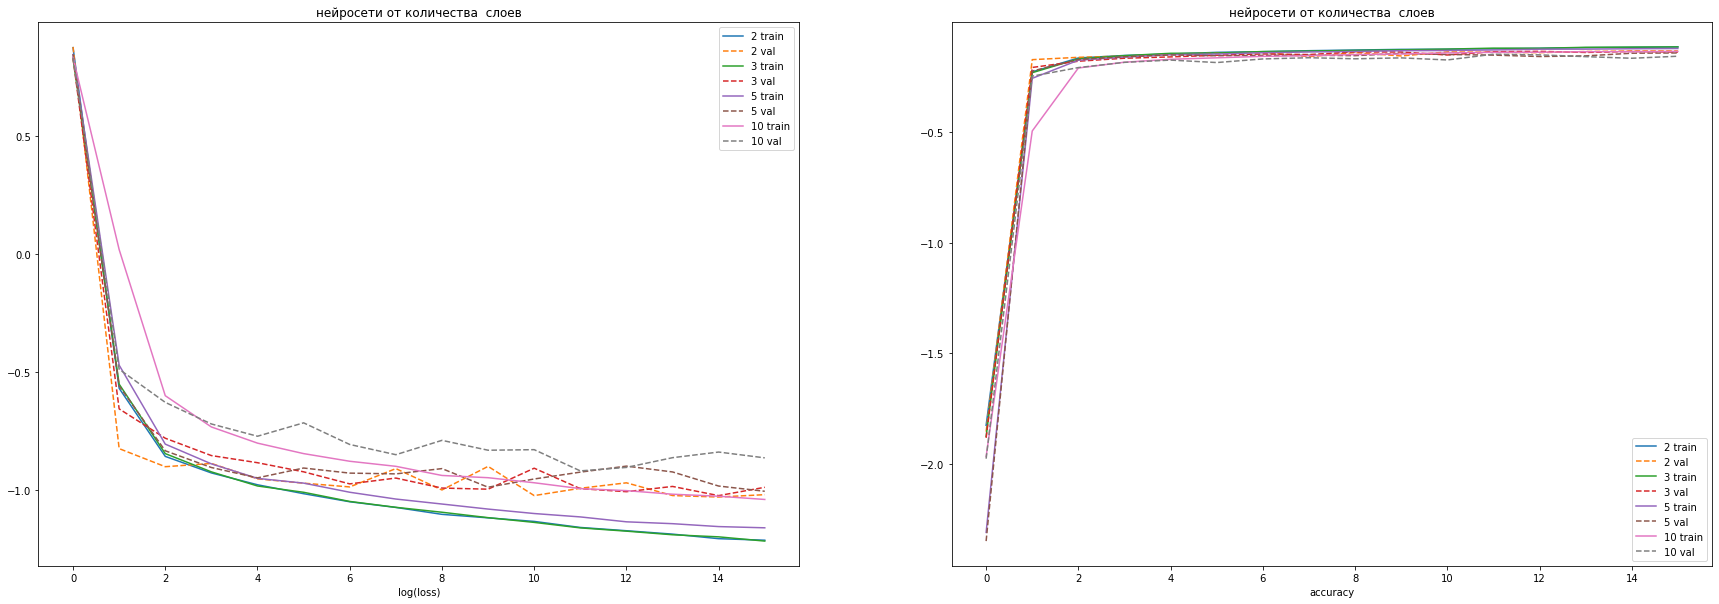

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(30, 10)

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

#суммарное количество нейронов на скрытых слоях
n_neurons = 128 - 16

# будем изменять количество слоев
for n_layers in [2, 3, 5, 10]:
  # создаем рабочую модель modeli
  modeli = Sequential()
  modeli.add(Dense(16, activation='relu', input_shape=(784,)))

  for i in range(n_layers - 1):
    modeli.add(Dense(n_neurons // n_layers, activation='relu'))

  modeli.add(Dense(10, activation='softmax'))

  # компилируем modeli
  modeli.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:50000,:], to_categorical(train_labels[:50000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[50000:,:], to_categorical(train_labels[50000:]),verbose = 0)

  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )
  # картинки
  ax[0].plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str(n_layers)+' train')
  ax[0].plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(n_layers)+' val')

  ax[1].plot(epoch,np.log([hh0_tr[1]]+hh.history['accuracy']),'-',label = str(n_layers) + ' train')
  ax[1].plot(epoch,np.log([hh0_val[1]]+hh.history['val_accuracy']),'--',label = str(n_layers) + ' val')

ax[0].legend()
ax[0].set_title('нейросети от количества  слоев')
ax[0].set_xlabel('epoch')
ax[0].set_xlabel('log(loss)')

ax[1].legend()
ax[1].set_title('нейросети от количества  слоев')
ax[1].set_xlabel('epoch')
ax[1].set_xlabel('accuracy')

plt.show()

С увеличением количества слоев сеть обучается хуже. Оптимально 2-3 скрытых слоя.

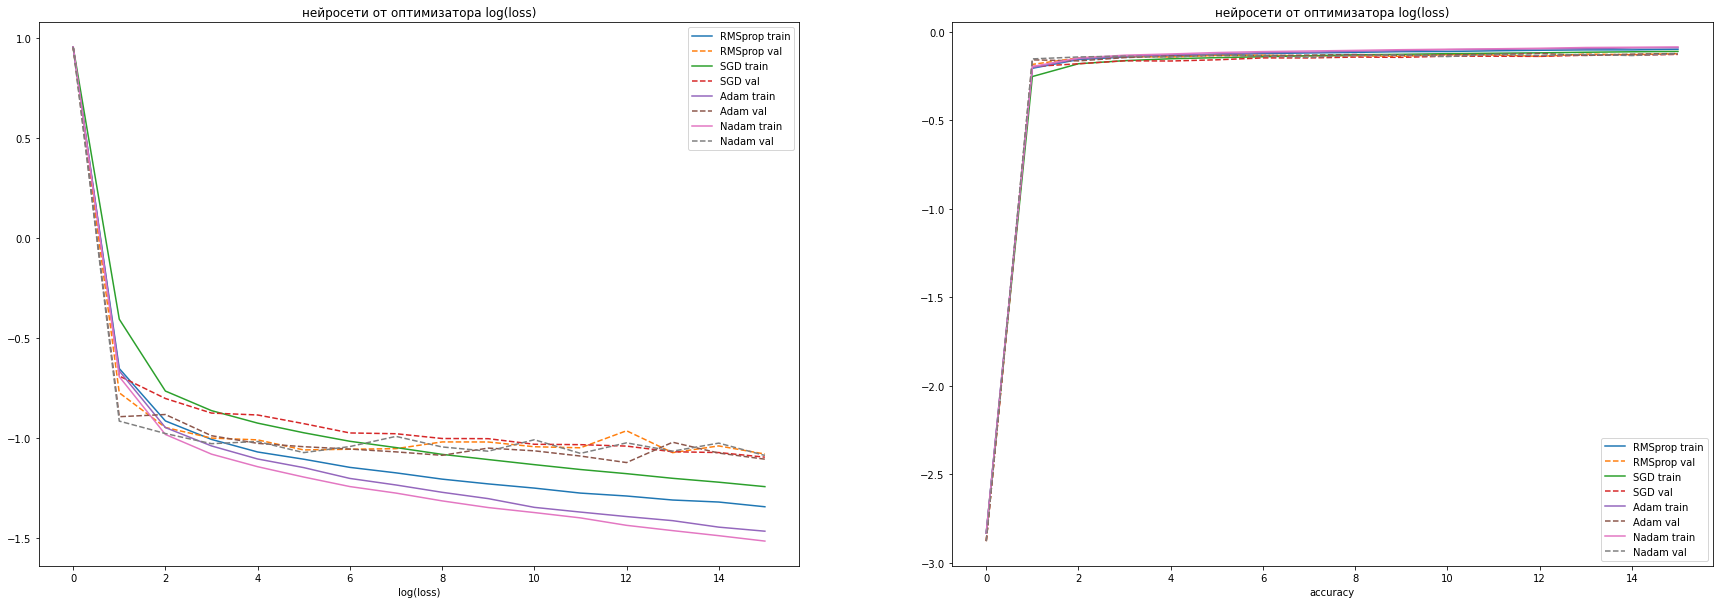

In [42]:
# создаем модель model
model = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(30, 10)

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [optimizers.RMSprop(),optimizers.SGD(),optimizers.Adam(),optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )
  # картинки
  ax[0].plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  ax[0].plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')

  ax[1].plot(epoch,np.log([hh0_tr[1]]+hh.history['accuracy']),'-',label = modeli.optimizer.get_config()['name'] + ' train')
  ax[1].plot(epoch,np.log([hh0_val[1]]+hh.history['val_accuracy']),'--',label = modeli.optimizer.get_config()['name'] + ' val')

ax[0].legend()
ax[0].set_title('нейросети от оптимизатора log(loss)')
ax[0].set_xlabel('epoch')
ax[0].set_xlabel('log(loss)')

ax[1].legend()
ax[1].set_title('нейросети от оптимизатора log(loss)')
ax[1].set_xlabel('epoch')
ax[1].set_xlabel('accuracy')

plt.show()

Я бы увеличила количество нейронов и, возможно, взяла бы 2 скрытых слоя.

С матрицей ошибок запуталась. Даже не знаю, с чего лучше начать.